# A01 EDA & causal discovery & data preprocessing
author:SheltonXiao

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import OrdinalEncoder, StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error as rmse
import lightgbm as lgb

import unittest
from causallearn.search.ConstraintBased.PC import pc
from causallearn.search.ConstraintBased.FCI import fci
from causallearn.utils.cit import fisherz, chisq, gsq, mv_fisherz, kci
from causallearn.utils.GraphUtils import GraphUtils
from causallearn.utils.PCUtils.BackgroundKnowledge import BackgroundKnowledge

import sweetviz as sv

import missingno as msmo

from sklearn.metrics import mean_squared_error as rmse
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
np.random.seed(233)

In [4]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

## EDA 

In [5]:
train.describe()

,V_0,V_1,V_2,V_3,V_4,V_5,V_6,V_7,V_9,V_11,...,V_32,V_33,V_34,V_35,V_36,V_37,V_38,V_39,treatment,outcome
count,36188.000000,36188.000000,36188.000000,36188.000000,36180.000000,36188.000000,36188.000000,36188.000000,36188.000000,36188.000000,...,36188.000000,36188.000000,36188.000000,36188.000000,36188.000000,36188.000000,36188.000000,36188.000000,36188.000000,36188.000000
mean,0.005911,3.001112,0.365212,-0.004739,-0.980966,1.171770,-40.512352,3.621588,963.052725,-0.000140,...,-40.791139,3.000914,-1.046220,2.999334,40.017603,0.081016,0.396153,2.005416,1.183265,-12.293164
std,1.028453,2.041526,0.512065,1.033147,5.427065,0.608619,4.632173,1.733371,185.487825,1.017149,...,78.766630,2.082557,5.126031,2.029812,10.419342,1.570984,0.626175,1.397139,0.958684,17.647651
min,-10.423873,-14.252472,-7.697856,-11.509785,-83.871493,0.000000,-50.800000,0.634000,0.000000,-8.799505,...,-1029.929566,-15.568324,-44.356574,-14.916829,17.000000,-3.400000,0.000000,0.000000,0.000000,-147.639220
25%,-0.672566,1.657705,0.000000,-0.675581,-4.368427,1.000000,-42.700000,1.344000,999.000000,-0.674622,...,-90.059662,1.631809,-4.400079,1.649582,32.000000,-1.800000,0.000000,1.000000,0.000000,-23.472156
50%,0.010103,3.009488,0.000000,-0.002705,-0.948506,1.000000,-41.800000,4.857000,999.000000,-0.003472,...,-39.616420,3.004567,-1.070897,3.002983,38.000000,1.100000,0.000000,2.000000,2.000000,-12.053491
75%,0.672820,4.353201,1.000000,0.666275,2.404243,2.000000,-36.400000,4.961000,999.000000,0.680092,...,10.390097,4.354266,2.306248,4.353828,47.000000,1.400000,1.000000,3.000000,2.000000,-0.729568
max,11.382669,21.625267,7.467822,9.971673,98.492161,3.000000,-26.900000,5.045000,999.000000,7.522138,...,764.525893,24.803207,37.102730,17.895538,98.000000,1.400000,5.000000,4.000000,2.000000,136.445860


In [6]:
train["treatment"] = train["treatment"].astype("str")

In [ ]:
train_report1 = sv.compare_intra(train[train["treatment"]!="2"],
                                condition_series = train[train["treatment"]!="2"]["treatment"]=="0",
                                names = ["0","1"],
                                target_feat = "outcome",
                                pairwise_analysis = "off")

In [ ]:
train_report1.show_html("../datareport/train_outcome_treatment1.html")

Report train_outcome_treatment1.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
train_report2 = sv.compare_intra(train[train["treatment"]!="1"],
                                condition_series = train[train["treatment"]!="1"]["treatment"]=="0",
                                names = ["0","2"],
                                target_feat = "outcome",
                                pairwise_analysis = "off")

Feature: treatment                           |██████████| [100%]   03:36 -> (00:00 left)
Feature: treatment                           |██████████| [100%]   00:36 -> (00:00 left)


In [ ]:
train_report2.show_html("../datareport/train_outcome_treatment2.html")

Report train_outcome_treatment2.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
train_report3 = sv.compare_intra(train[train["treatment"]!="0"],
                                condition_series = train[train["treatment"]!="0"]["treatment"]=="1",
                                names = ["1","2"],
                                target_feat = "outcome",
                                pairwise_analysis = "off")

Feature: treatment                           |██████████| [100%]   00:32 -> (00:00 left)


In [ ]:
train_report3.show_html("../datareport/train_outcome_treatment_no0.html")

Report train_outcome_treatment_no0.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


存在类别不均衡现象，treatment1数据偏少

## data process

此部分使用baseline的处理方式，为causal discovery做准备，并非为预测做准备

缺失值基础填充

In [7]:
def build_data(train):
    train_ = {}
    for i in train.columns:
        train_i = train[i]
        if any(train[i].isna()):
            train_i = train_i.replace(np.nan, train[i].mean())
        if len(train_i.value_counts()) <= 20 and train_i.dtype != object:
            train_i = train_i.astype(int)
        train_[i] = train_i

    return pd.DataFrame(train_)

In [8]:
train = build_data(train)
test = build_data(test)

类型及scale转化

In [9]:
all_cov = list(train.columns)
# save data and their corresponding transformers
class TransData:
    def __init__(self, name, is_obj=False):
        self.is_obj = is_obj
        self.name = name
        self.transformer = None

    def __call__(self, data):
        self.df = data[self.name]
        series = self.df.to_numpy().reshape(-1, 1)
        if self.df.dtype == object:
            self.is_obj = True
            self.transformer = OrdinalEncoder()
            self.data = self.transformer.fit_transform(series).astype(int)
        elif self.df.dtype != int:
            if self.name == "outcome":
                self.data = series
            else:
                self.transformer = StandardScaler()#MinMaxScaler(feature_range=(-1, 1))#StandardScaler()
                self.data = self.transformer.fit_transform(series)
        else:
            self.data = series

In [10]:
# data preprocessing
data_dict = {}
cat_name = []
test_dict = {}

for name in all_cov:
    t = TransData(name=name)
    t(train)
    data_dict[name] = t.data.reshape(-1, )
    if t.is_obj:
        cat_name.append(name)
    if name not in ['treatment', 'outcome']:
        try:
            test_i = t.transformer.transform(test[name].values.reshape(-1, 1)).reshape(-1, )
        except:
            test_i = test[name]
        test_dict[name] = test_i

In [11]:
train_transformed = pd.DataFrame(data_dict)
test_data = pd.DataFrame(test_dict)

In [12]:
train_transformed.head()

,V_0,V_1,V_2,V_3,V_4,V_5,V_6,V_7,V_8,V_9,...,V_32,V_33,V_34,V_35,V_36,V_37,V_38,V_39,treatment,outcome
0,1.723577,-0.305753,-0.713223,-1.621706,-0.110603,0,1.967215,-1.605903,0,-5.175898,...,0.983957,1.170614,-0.043524,1.491432,1.246007,-2,0,3,2,4.745129
1,-0.620006,1.144513,-0.713223,-0.836881,-0.329293,0,-0.321160,0.287543,0,0.193801,...,0.935753,0.229336,0.849727,0.005753,0.958077,0,2,4,0,7.310963
2,-0.844489,0.105237,1.239680,-1.558425,-0.300993,1,-0.277983,0.717924,0,0.193801,...,-2.043339,-0.713962,-0.861334,0.631476,-0.289619,1,1,2,2,-52.156193
3,0.218723,-0.367827,-0.713223,-1.575069,-0.870663,1,0.952558,0.775616,0,0.193801,...,-0.358267,0.035055,0.845040,0.112702,-0.481573,1,0,3,0,-17.011566
4,0.183640,0.928402,-0.713223,-0.134138,0.654154,1,-0.472279,0.776770,0,0.193801,...,-0.078760,-0.046988,-0.110786,0.682046,1.725891,1,0,2,2,-15.229788


中间文件已提供，下面代码可以不用运行

## Causal discovery

In [13]:
V = train_transformed.drop(['treatment', 'outcome'], axis=1).values
x = train_transformed['treatment'].values
y = train_transformed['outcome'].values

### 1 去除关系较弱的变量

引用baseline的代码，去除关系很弱的变量，提高PC算法的计算速度

In [14]:
x_model = RandomForestClassifier(n_estimators=150, criterion='entropy', max_features=0.5, max_depth=50)
y_model = RandomForestRegressor(n_estimators=150, max_features=0.5, max_depth=100, )
x_model.fit(V, x)
x_importance = x_model.feature_importances_

y_model_input = np.concatenate((V, x.reshape(-1, 1)), axis=1)
y_model.fit(y_model_input, y=y)
y_importance = y_model.feature_importances_

In [15]:
confounder_list = []
for i, (x_, y_) in enumerate(zip(x_importance, y_importance)):
    if x_ >= 1e-3 and y_ >= 1e-5:
        confounder_list.append(all_cov[i])

V_new = train_transformed[confounder_list + ['treatment'] + ['outcome']]

### 2 使用PC算法进行因果发现

In [16]:
data = V_new.copy()

data = data.values
    
cg = pc(data,alpha = 0.05,indep_test = fisherz,stable = True,uc_rule = 1,uc_priority = 1,)

  0%|          | 0/36 [00:00<?, ?it/s]

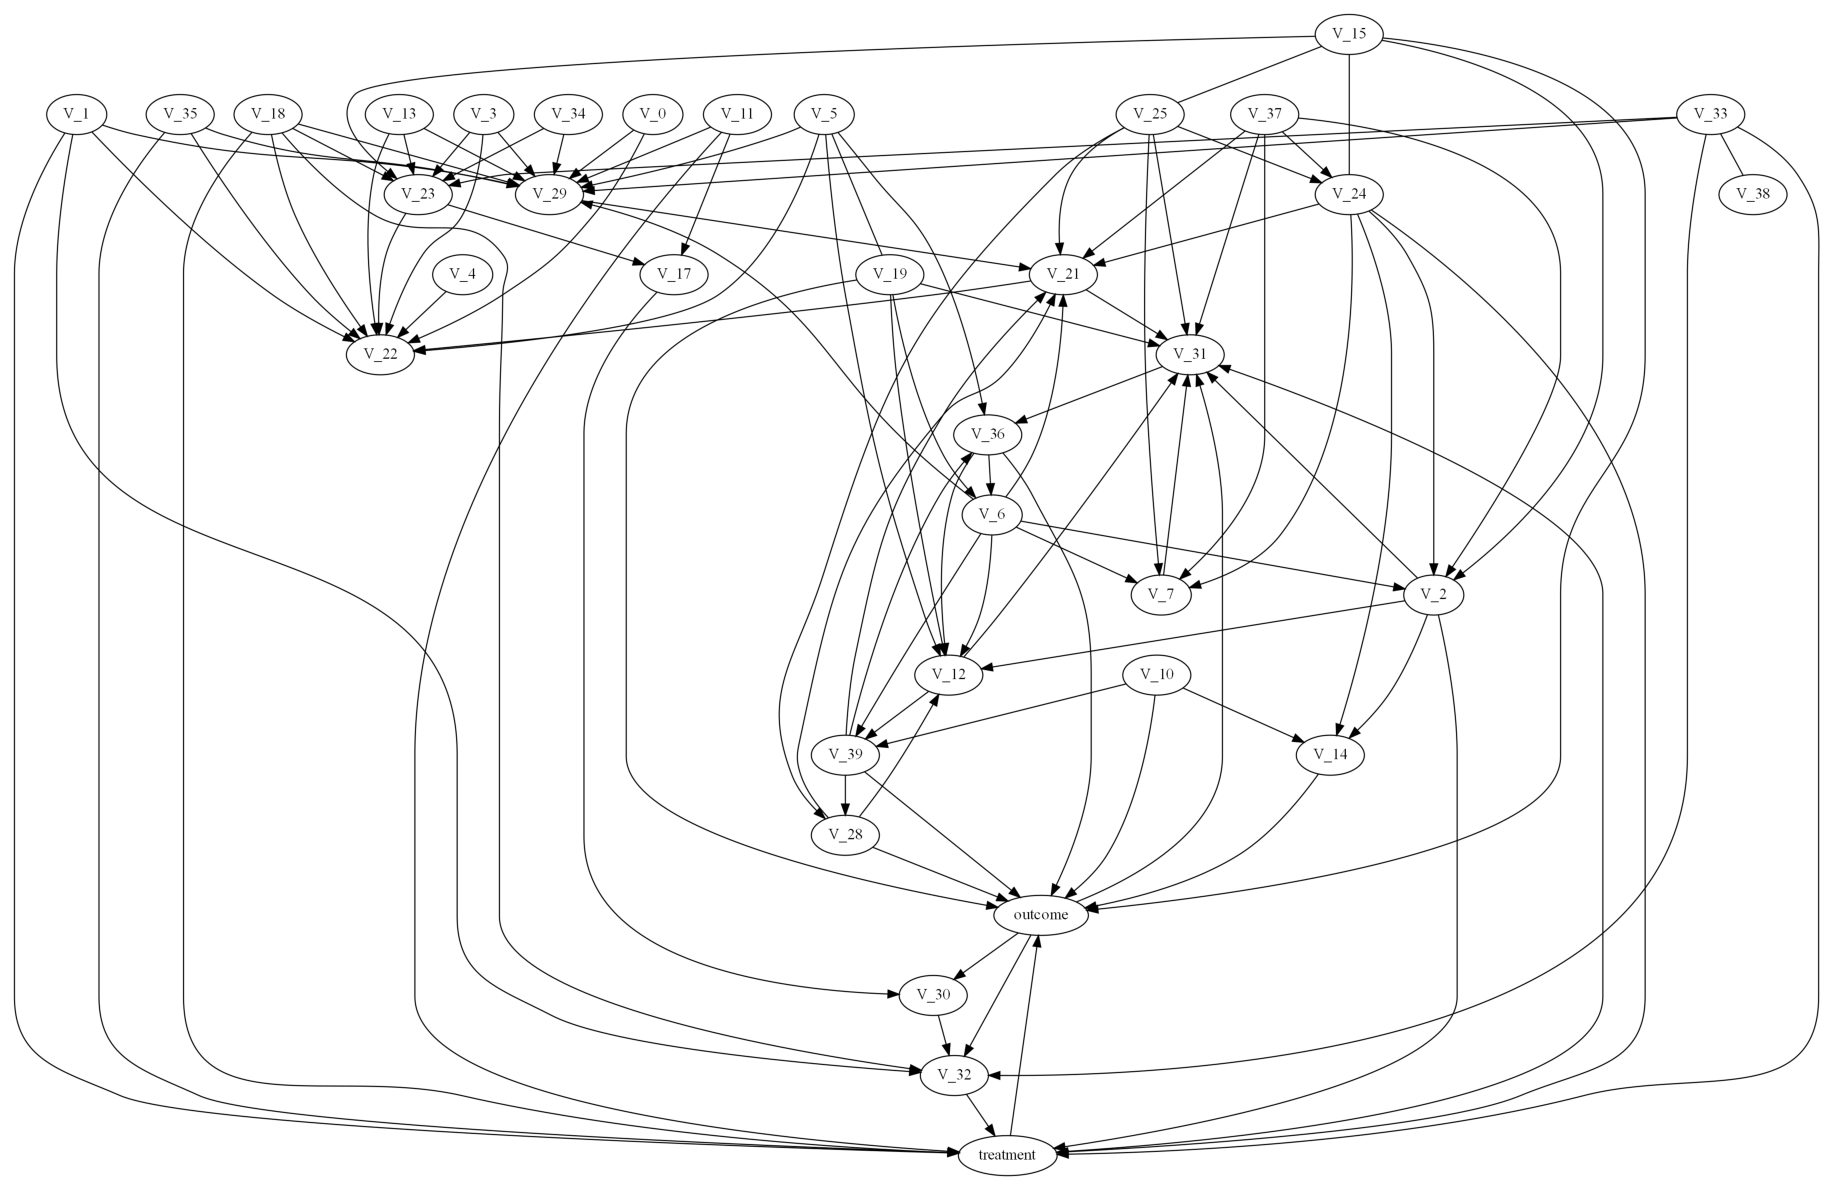

In [ ]:
cg.draw_pydot_graph(labels = V_new.columns.tolist())

### 3 分组discover
看起来眼睛没那么花

根据上图可以尝试对变量进行手动分组

In [17]:
W1C = ["V_"+str(each) for each in [5,19,6,21,24,14,15,2,12,36,31,37,7,25,28,39,10]]
C1W = ["V_"+str(each) for each in [1,32,30,11,18,35]]

In [18]:
V_new = train_transformed

In [19]:
data = V_new[W1C+["V_38","V_29"]+["treatment","outcome"]].copy()

data = data.values
    
cg = pc(data,
        alpha = 0.05,
        indep_test = fisherz,
        stable = True,
        uc_rule = 0,
        uc_priority = 0)#1)

nodes = cg.G.get_nodes()

  0%|          | 0/21 [00:00<?, ?it/s]

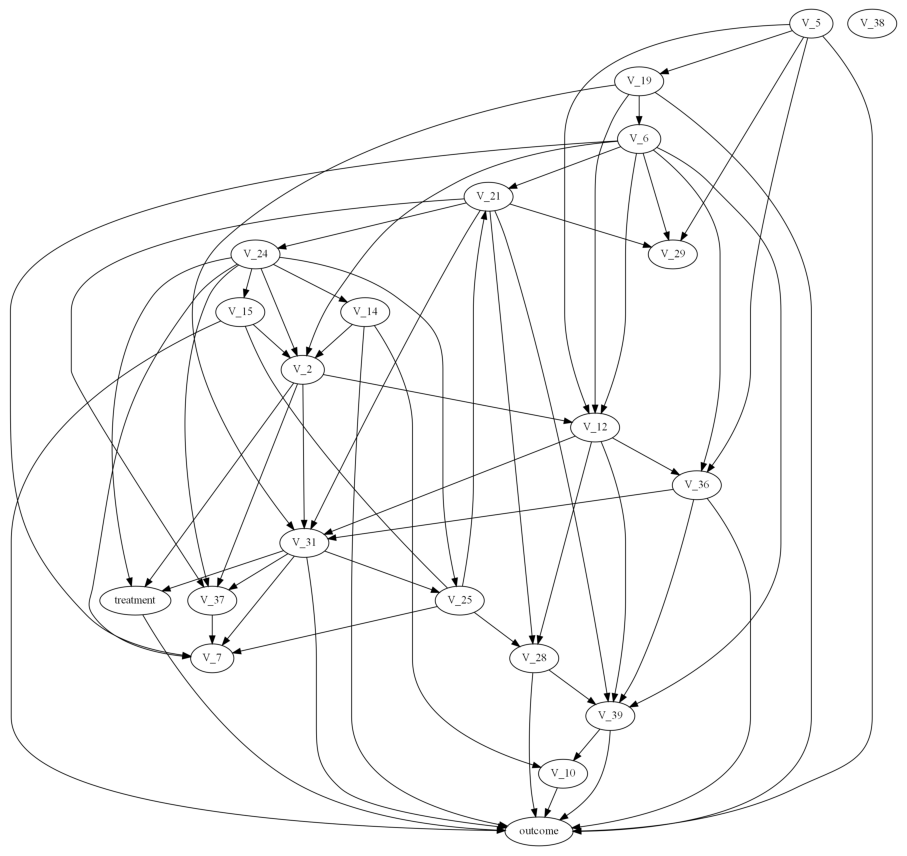

In [ ]:
cg.draw_pydot_graph(labels = V_new[W1C+["V_38","V_29"]+["treatment","outcome"]].columns.tolist())

可以选出直接相关的变量

In [20]:
sW1C = ["V_"+str(each) for each in [5,19,24,14,15,2,36,31,28,39,10]]

## Data preprocessing

### 1 缺失值填补

缺失值填补，根据因果图节点连接关系填补

In [21]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [22]:
all_cov = list(train.columns)

In [23]:
data_dict = {}
cat_name = []
test_dict = {}
t = {}

for name in all_cov:
    t = TransData(name=name)
    t(train)
    data_dict[name] = t.data.reshape(-1, )
    if t.is_obj:
        cat_name.append(name)
    if name not in ['treatment', 'outcome']:
        try:
            test_i = t.transformer.transform(test[name].values.reshape(-1, 1)).reshape(-1, )
        except:
            test_i = test[name]
        test_dict[name] = test_i
data_t = pd.DataFrame(data_dict)
test_t = pd.DataFrame(test_dict)

In [ ]:
data_t

,V_0,V_1,V_2,V_3,V_4,V_5,V_6,V_7,V_8,V_9,V_10,V_11,V_12,V_13,V_14,V_15,V_16,V_17,V_18,V_19,V_20,V_21,V_22,V_23,V_24,V_25,V_26,V_27,V_28,V_29,V_30,V_31,V_32,V_33,V_34,V_35,V_36,V_37,V_38,V_39,treatment,outcome
0,1.723577,-0.305753,-0.713223,-1.621706,-0.110591,-1.925319,1.967215,-1.605903,0,-5.175898,0,-1.303248,-0.348343,1.442065,1,1.672155,2.952457,1.421553,-1.144527,-1.037383,0.0,-0.203995,-0.655137,0.335958,-2.372261,-1.259312,0,0.0,-0.384457,-0.655414,-0.891028,-1.399182,0.983957,1.170614,-0.043524,1.491432,1.246007,-1.897573,-0.632665,0.711882,0.851945,4.745129
1,-0.620006,1.144513,-0.713223,-0.836881,-0.329257,-1.925319,-0.321160,0.287543,0,0.193801,0,-1.324106,-0.348343,1.210960,0,1.672155,-2.565892,-0.645547,1.471848,-0.203482,0.0,-0.203995,0.652542,0.811797,-0.647319,0.398159,0,0.0,-0.474595,-0.391229,-1.024657,1.190330,0.935753,0.229336,0.849727,0.005753,0.958077,-0.115226,2.561375,1.427640,-1.234277,7.310963
2,-0.844489,0.105237,1.239680,-1.558425,-0.300959,-0.282232,-0.277983,0.717924,0,0.193801,0,-1.319172,-0.348343,-1.349248,1,-0.348615,0.193282,-0.793863,0.280072,-1.037383,0.0,-0.562927,-0.625467,-1.801277,1.536917,0.845788,0,0.0,1.269372,-0.889279,2.079844,-0.104426,-2.043339,-0.713962,-0.861334,0.631476,-0.289619,0.839603,0.964355,-0.003877,0.851945,-52.156193
3,0.218723,-0.367827,-0.713223,-1.575069,-0.870567,-0.282232,0.952558,0.775616,0,0.193801,1,0.162183,-0.348343,0.994623,0,-0.348615,0.193282,1.191752,0.178366,1.464319,0.0,-0.562927,-0.139048,0.343167,-0.226012,0.845788,2,0.0,0.191640,-0.318317,0.245245,-1.399182,-0.358267,0.035055,0.845040,0.112702,-0.481573,0.839603,-0.632665,0.711882,-1.234277,-17.011566
4,0.183640,0.928402,-0.713223,-0.134138,0.654082,-0.282232,-0.472279,0.776770,0,0.193801,1,0.253348,1.057200,1.275344,0,-0.348615,0.193282,-0.529210,-1.275973,0.074484,0.0,6.256788,1.095858,1.084322,0.592430,0.845788,0,0.0,-0.882174,0.957660,0.151881,-0.536011,-0.078760,-0.046988,-0.110786,0.682046,1.725891,0.839603,-0.632665,-0.003877,0.851945,-15.229788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36183,0.798280,0.651603,-0.713223,-1.497037,-0.354404,-1.925319,-1.227874,-1.368213,0,0.193801,2,-0.431662,-0.348343,-0.933722,2,-0.348615,0.193282,0.532660,0.148898,1.464319,0.0,-0.562927,0.573087,0.101566,-1.177406,-0.941954,0,0.0,-0.129720,-1.917703,-1.714248,0.758745,1.822812,0.144631,1.592932,1.226250,-0.673526,-1.197365,0.964355,-1.435393,0.851945,20.512318
36184,0.608491,-0.792157,-0.713223,-0.393239,1.006865,-0.282232,-0.472279,0.773308,0,0.193801,0,1.523029,1.057200,-0.555947,0,-0.348615,0.193282,-2.885448,0.551556,-1.037383,0.0,1.231735,1.176672,0.244495,0.592430,0.845788,0,0.0,2.123720,0.978339,-0.477015,-0.536011,0.377710,-0.428146,0.124469,-0.922082,0.190264,0.839603,-0.632665,1.427640,-1.234277,-3.178066
36185,-0.076171,0.939327,-0.713223,-0.335713,-0.726944,-0.282232,0.952558,0.773885,0,0.193801,0,0.629669,-0.816858,0.435159,1,-0.348615,0.193282,0.516416,0.858386,1.742286,0.0,-0.562927,-0.673896,-0.391170,-0.226012,0.845788,0,0.0,-0.756765,0.637148,1.640406,-1.399182,-1.779926,0.280735,-1.194375,0.430499,0.574171,0.839603,-0.632665,-0.003877,-1.234277,-43.733190
36186,-1.006859,0.799582,-0.713223,-0.475637,0.907525,-0.282232,-1.227874,-1.319752,0,0.193801,0,-0.935424,0.588686,-1.276860,1,-0.348615,0.193282,-0.493118,-1.030609,-0.759416,0.0,-0.562927,-0.440466,-0.916839,-1.177406,-0.941954,0,0.0,-0.439324,-0.695166,-1.317067,0.758745,1.418088,0.463289,-0.988903,2.195462,-0.097666,-1.197365,0.964355,1.427640,0.851945,12.905083


In [24]:
data = data_t.dropna(how='any')[W1C+["V_38","V_29"]]

In [25]:
data = data.values
    
cg = pc(data,
        alpha = 0.05,
        indep_test = fisherz,
        stable = True,
        uc_rule = 0,
        uc_priority = 0)#1)

nodes = cg.G.get_nodes()

  0%|          | 0/19 [00:00<?, ?it/s]

In [26]:
rema = cg.G.graph
col = W1C+["V_38","V_29"]

<AxesSubplot:>

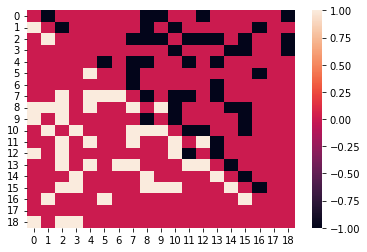

In [ ]:
sns.heatmap(rema)

In [27]:
ind_lis = list(enumerate(col))

In [28]:
#有缺失值的列
na_col = []
for eachcol in col:
    if any(data_t[eachcol].isna()):
        na_col.append(eachcol)

In [29]:
def find_neighbor(colname):
    variable = []
    for n in ind_lis:
        if colname == n[1]:
            ind = n[0]
    variable = np.nonzero(rema[ind,:])
    variable = [ind_lis[each][1] for each in variable[0]]
    return variable

In [30]:
def find_variable(variable,na_col):
    a = variable.copy()
    for each in a:
        new = find_neighbor(each)
        variable.extend(new)
    variable = list((set(variable)-set(na_col)))
    return variable

In [31]:
variable = find_neighbor(na_col[0])
variable = find_variable(variable,na_col)

In [32]:
X = data_t.dropna()
y = X[na_col[0]]
X = X[variable]
ind0 = data_t[na_col[0]].isna()
X_test = data_t[ind0][variable]
X_tr,X_val,y_tr,y_val = train_test_split(X, y, train_size = 0.8, random_state = 2022)
#clf = lgb.LGBMRegressor(n_estimators=250, max_depth=150, metric='rmse',min_child_samples=2)
clf = RandomForestRegressor(n_estimators=250, max_depth=150, min_samples_leaf=2, min_samples_split=3, max_features=3)
clf.fit(X_tr,y_tr)

RandomForestRegressor(max_depth=150, max_features=3, min_samples_leaf=2,
                      min_samples_split=3, n_estimators=250)

In [33]:
rmse(y_tr,clf.predict(X_tr))

0.4748788345382306

In [34]:
rmse(y_val,clf.predict(X_val))

1.0611176171617893

In [35]:
rmse(y,clf.predict(X))

0.5921265910629423

In [36]:
data_t[na_col[0]][ind0]= clf.predict(X_test)

In [37]:
test_t[na_col[0]][test_t[na_col[0]].isna()] = clf.predict(test_t[test_t[na_col[0]].isna()][variable])

中间文件已提供，下面代码可以不用运行

### 2 离群值分析及处理

观察到V_28连续变量离群值很有特点，而且本身列有缺失，若直接填补也有一定可能会影响效果，考虑分开mask预测

In [38]:
col = sW1C
col = [each for each in col if col not in cat_name]

<AxesSubplot:>

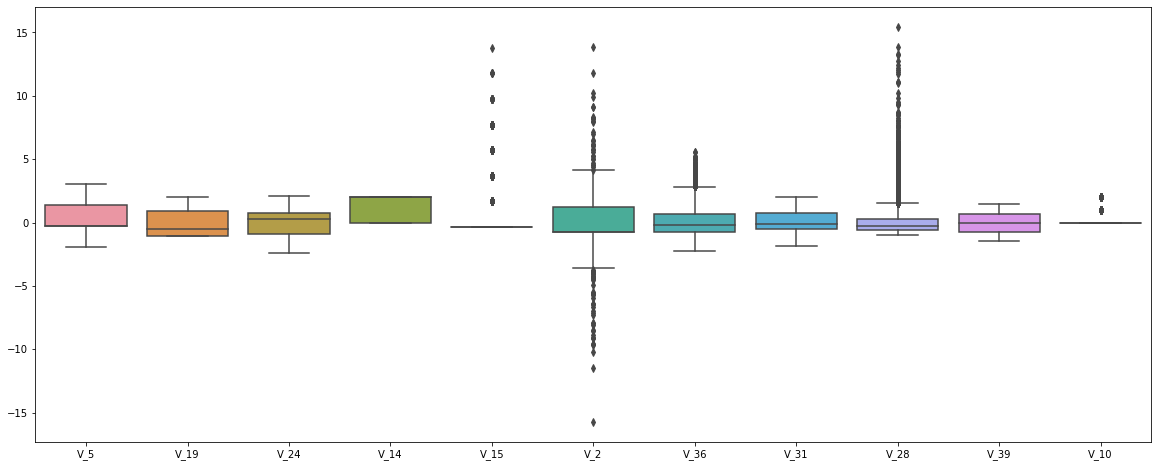

In [39]:
plt.figure(figsize = (20,8))
sns.boxplot(data = data_t[col])

<AxesSubplot:>

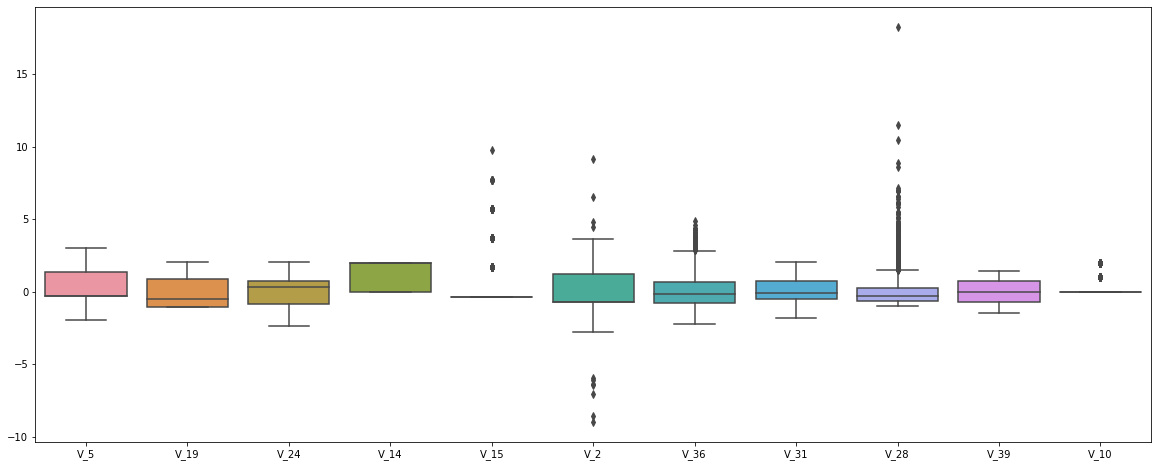

In [40]:
plt.figure(figsize = (20,8))
sns.boxplot(data = test_t[col])

In [41]:
def judge_outlier(se,se2):
    up = se.quantile(0.75)
    down = se.quantile(.25)
    k = 2
    uplim = up + k*(up-down)
    downlim = down - k*(up-down)
    return [each > uplim or each < downlim for each in se],[each > uplim or each < downlim for each in se2]

In [42]:
label,label2 = judge_outlier(data_t["V_28"],test_t["V_28"])

In [43]:
data_t["V_28"][label] = None
test_t["V_28"][label2] = None

In [44]:
X = data_t.dropna()
y = X["V_28"]
X = X[variable]
ind0 = data_t["V_28"].isna()
X_test = data_t[ind0][variable]
X_tr,X_val,y_tr,y_val = train_test_split(X, y, train_size = 0.8, random_state = 2022)
#clf = lgb.LGBMRegressor(n_estimators=250, max_depth=150, metric='rmse',min_child_samples=2)
clf = RandomForestRegressor(n_estimators=250, max_depth=150, min_samples_leaf=2, min_samples_split=3, max_features=3)
clf.fit(X_tr,y_tr)

RandomForestRegressor(max_depth=150, max_features=3, min_samples_leaf=2,
                      min_samples_split=3, n_estimators=250)

In [45]:
rmse(y_tr,clf.predict(X_tr))

0.17207019871198895

In [46]:
rmse(y_val,clf.predict(X_val))

0.3849617615036362

In [47]:
rmse(y,clf.predict(X))

0.2146485112703184

In [48]:
data_t["V_28"][ind0]= clf.predict(X_test)

In [49]:
test_t["V_28"][test_t["V_28"].isna()] = clf.predict(test_t[test_t["V_28"].isna()][variable])

中间文件已提供，下面代码可以不用运行